<a href="https://colab.research.google.com/github/Mevaourse/FaceRecognition/blob/main/Tugas_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tugas 1 Bengkel Koding

In [ ]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_csv('/content/adult.csv')

In [ ]:
#disini dataset belom ada nama kolom
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
#menambahkan nama kolom

col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
 'hours_per_week', 'native_country', 'income']

df.columns = col_names
df.head()


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   education_num   32560 non-null  int64 
 5   marital_status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital_gain    32560 non-null  int64 
 11  capital_loss    32560 non-null  int64 
 12  hours_per_week  32560 non-null  int64 
 13  native_country  32560 non-null  object
 14  income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Tipe Data:
---
6 kolom numerik (int64): age, fnlwgt, education_num, capital_gain, capital_loss, hours_per_week
---
9 kolom kategori (object): workclass, education, marital_status, occupation, relationship, race, sex, native_country, income
---

In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


Ketika kita melakukan ***function*** .isnull pada dataset disini terlihat bahwa pada dataset tidak ada missing values pada dataset. Tetapi ketika kita melihat dengan manual pada dataset, terdapat beberapa missing value, namun pada dataset missing value ditulis menggunakan " ?" bukan dengan "null" sehingga tidak terdeteksi oleh ***function*** "isnull"

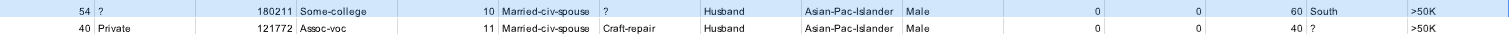

In [ ]:
from IPython.display import Image
Image('dataset.png')


In [ ]:
print((df ==' ?').sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


Dengan menggunakan kode di atas kita menjadi tahu jumlah missing value yang disimbolkan menggunakan " ?".

Dimana terdapat : 1836 missing values pada colomn workclass, 1843 missing values pada colomn occupation dan 583 pada colomn native_country

Untuk proses training model, lebih baiknya kita merubah " ?" menjadi missing values yang benar, di bawah ini adalah kode untuk merubahnya.

In [ ]:


# Konversi tanda "?" menjadi NaN secara eksplisit
df.replace(" ?", pd.NA, inplace=True)

# Cek ulang jumlah missing values
print("\nJumlah Missing Values setelah konversi:")
print(df.isnull().sum())



Jumlah Missing Values setelah konversi:
age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


Setelah missing value berwujudkan " ?" dirubah ke "NA" berikutnya kita harus melakukan proses pre-processing data.

Disini karena kolom yang mempunyai missing value merupakan kolom Kategorikal, maka kita menggunakan teknik mengisi missing value dengan modus atau nilai terbanyak yang ada pada kolom tersebut.

In [ ]:
from sklearn.impute import SimpleImputer
import numpy as np # Make sure numpy is imported

# Buat imputer dengan strategi "most_frequent" (modus)
imputer = SimpleImputer(strategy="most_frequent")

# Daftar kolom kategori yang akan diisi
cat_cols = ["workclass", "occupation", "native_country"]

# Convert pd.NA to np.nan before applying imputation
df[cat_cols] = df[cat_cols].fillna(np.nan) # This line is crucial

# Terapkan imputasi pada setiap kolom
df[cat_cols] = imputer.fit_transform(df[cat_cols])


In [ ]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


Semua baris missing value dihapus

In [ ]:
print("\nStatistik Deskriptif Numerik:")
display(df.describe())


Statistik Deskriptif Numerik:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Numerik:
---
Age: Rentang usia dari 17 hingga 90 tahun dengan rata-rata 38.6 tahun.

Capital Gain dan Capital Loss: Banyak nilai 0, menunjukkan bahwa hanya sedikit individu yang memiliki keuntungan atau kerugian modal.

Hours per Week: Rata-rata 40.4 jam, dengan nilai minimum 1 jam dan maksimum 99 jam.

In [ ]:
print("\nDistribusi Data Kategorikal:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n{col}:\n", df[col].value_counts())



Distribusi Data Kategorikal:

workclass:
 workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1297
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

education:
 education
HS-grad         10501
Some-college     7291
Bachelors        5354
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64

marital_status:
 marital_status
Married-civ-spouse       14976
Never-married            10682
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

occupation:
 occupation
Prof-specia

Kategori:

Workclass: Mayoritas bekerja di sektor Private (22.696 orang).

Education: Pendidikan terbanyak adalah HS-grad (10.501 orang) dan Some-college (7.291 orang).

Marital Status: Mayoritas Married-civ-spouse (14.976 orang) dan Never-married (10.683 orang).

Occupation: Terbanyak di bidang Prof-specialty, Craft-repair, dan Exec-managerial.

Race: Didominasi oleh White (27.816 orang).

Sex: Lebih banyak laki-laki (21.790 orang) dibanding perempuan (10.771 orang).

Native Country: Mayoritas berasal dari United States (29.170 orang).

Income: Mayoritas berpenghasilan ≤50K (24.720 orang), hanya 7.841 orang memiliki >50K.

<ipython-input-159-f0936f53b120>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=df, ax=axes[0, 2], palette="pastel")
<ipython-input-159-f0936f53b120>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='workclass', data=df, ax=axes[1, 1], palette="viridis",


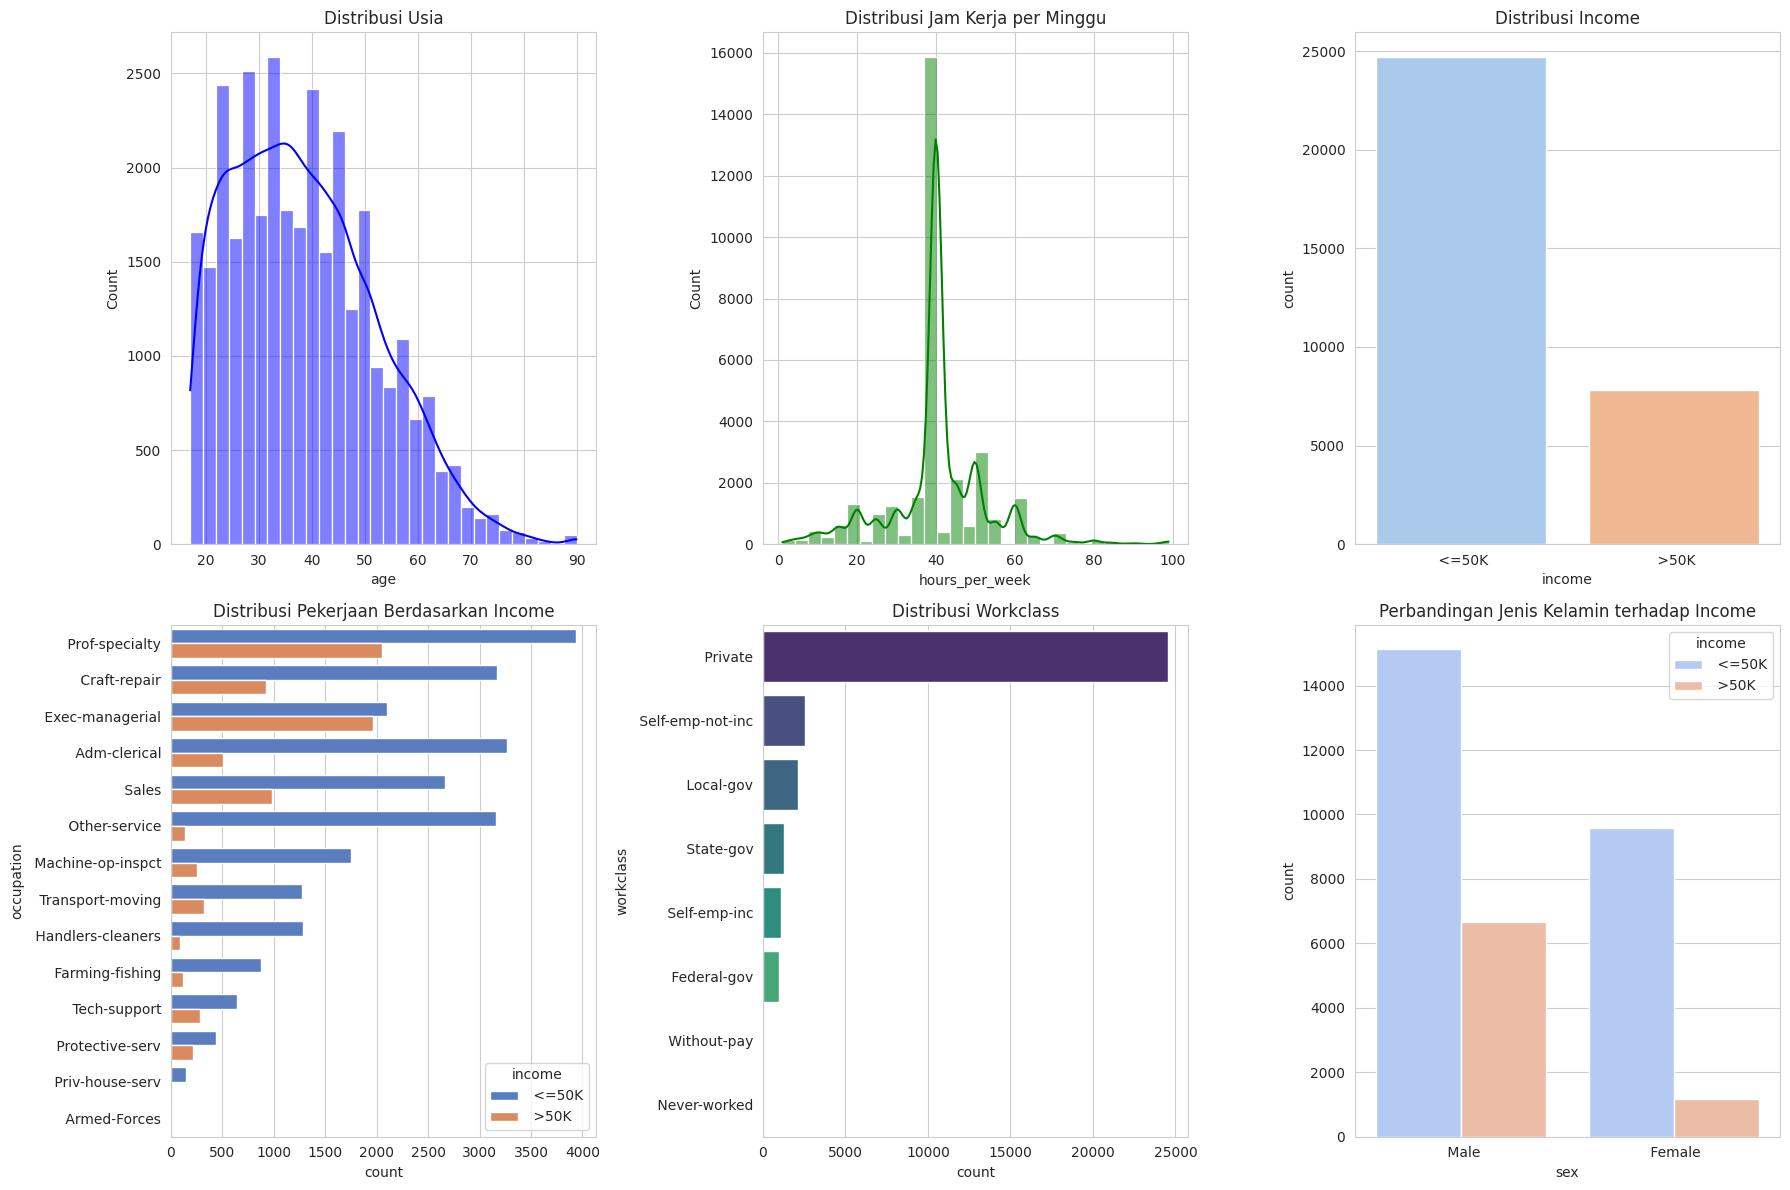

In [ ]:
# Set style
fig, axes = plt.subplots(2, 3, figsize=(18, 12))


# 1. Distribusi Usia
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title("Distribusi Usia")

# 2. Distribusi Jam Kerja per Minggu
sns.histplot(df['hours_per_week'], bins=30, kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title("Distribusi Jam Kerja per Minggu")

# 3. Distribusi Pendapatan
sns.countplot(x='income', data=df, ax=axes[0, 2], palette="pastel")
axes[0, 2].set_title("Distribusi Income")

# 4. Perbandingan Pekerjaan berdasarkan Income
sns.countplot(y='occupation', hue='income', data=df, ax=axes[1, 0], palette="muted",
              order=df['occupation'].value_counts().index)
axes[1, 0].set_title("Distribusi Pekerjaan Berdasarkan Income")

# 5. Distribusi Workclass
sns.countplot(y='workclass', data=df, ax=axes[1, 1], palette="viridis",
              order=df['workclass'].value_counts().index)
axes[1, 1].set_title("Distribusi Workclass")

# 6. Perbandingan Jenis Kelamin terhadap Income
sns.countplot(x='sex', hue='income', data=df, ax=axes[1, 2], palette="coolwarm")
axes[1, 2].set_title("Perbandingan Jenis Kelamin terhadap Income")

plt.tight_layout()
plt.show()


# **MODELLING**
---
Selanjutnya adalah proses melakukan modelling.

In [ ]:
# Menghapus kolom 'fnlwgt' karena kurang relevan
df.drop(columns=['fnlwgt'], inplace=True)

Kolom fnlwgt (final weight) dihapus karena:

1.Bukan fitur yang berguna untuk prediksi income

fnlwgt digunakan oleh Biro Sensus AS untuk menyesuaikan proporsi sampel agar lebih representatif terhadap populasi.
Ini lebih relevan untuk analisis statistik, bukan untuk model prediktif.

2️.Bisa menyebabkan kebisingan dalam model

Nilai fnlwgt sangat bervariasi tetapi tidak berhubungan langsung dengan income.
Menjaga kolom ini bisa menambah kompleksitas tanpa meningkatkan akurasi.

In [ ]:
# Memisahkan fitur numerik dan kategori
num_features = ['age', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
cat_features = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

# Pipeline untuk numerik: imputasi + normalisasi
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline untuk kategori: imputasi + one-hot encoding
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Menggabungkan kedua pipeline
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

Kode di atas  berfungsi untuk menyiapkan preprocessing data sebelum digunakan dalam model Machine Learning.

Walaupun di EDA sudah dilakukan pengisian modus pada missing value pada data bersifat Kategorikal, alangkah baiknya kita melakukan preprocessing keduakalinya agar pelatihan model dapat berjalan dengan baik.

Berikut penjelasan dari kode di atas :

1. Memisahkan fitur

  Tujuan:

    num_features → Berisi fitur numerik yang akan dinormalisasi.

    cat_features → Berisi fitur kategorikal yang perlu diubah menjadi numerik (One-Hot Encoding).

2. Pipeline untuk fitur numerik

  Apa yang dilakukan?

    a. Mengisi missing values dengan median (karena lebih tahan terhadap outlier).

    b. Melakukan normalisasi (StandardScaler) supaya semua fitur numerik berada dalam skala yang sama (mean=0, std=1).


3. Pipeline untuk fitur kategorikal

   Apa yang dilakukan?

    a. Mengisi missing values dengan modus (nilai yang paling sering muncul).

    b. Mengubah kategori menjadi angka dengan One-Hot Encoding, sehingga model bisa menggunakannya.

    c. handle_unknown='ignore' → Jika ada kategori baru yang tidak muncul saat training, model tidak error.

4. Menggabungkan kedua pipeline

 Apa yang dilakukan?

    a. Memproses fitur numerik dan kategorikal secara otomatis dalam satu langkah sebelum masuk ke model.

    b. Memastikan semua data bersih & dalam format yang sesuai untuk model Machine Learning.

In [ ]:
# Memisahkan fitur dan target
X = df.drop(columns=['income'])
y = df['income']

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


Akurasi Logistic Regression: 0.8595
Akurasi Random Forest: 0.8521
Akurasi SVM: 0.8624


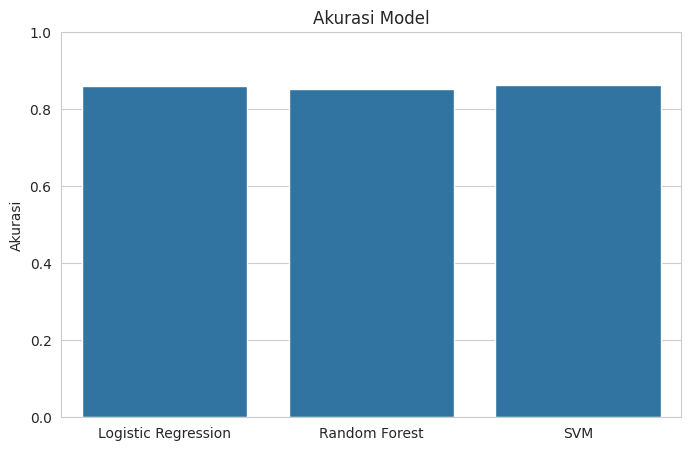

In [ ]:
# Model yang akan digunakan
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC()
}

# Melatih dan mengevaluasi model
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"Akurasi {name}: {acc:.4f}")

# Menampilkan hasil dalam bentuk bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Akurasi Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.show()

# Kesimpulan

1.Logistic Regression memberikan hasil akurasi yang layak namun lebih rendah dibanding model lain


2.Random Forest memberikan akurasi terbaik, menunjukkan bahwa model ini lebih mampu menangani data dengan banyak fitur kategori.

3.SVM juga memberikan performa yang baik, tetapi bisa lebih lambat dalam pelatihan karena kompleksitasnya.

4.Pembersihan data, termasuk menangani missing values dan encoding kategori, berperan penting dalam meningkatkan akurasi model.
